In [1]:
import sys
from pathlib import Path
# Get the repository root (1 levels up from current notebook)
repo_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, mean_absolute_error, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.decomposition import PCA

# Instantiate the Template class
Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR_clear.xlsx')
# import the data from all sheets of the Excel file


df6, df7, df8, df12, df13, df14 = [
    pd.read_excel(data_path, sheet_name=i) for i in range(6)
]

df_concatenation = pd.concat([df6, df7, df8, df12, df13, df14], ignore_index=True)

C:\Users\ricar\AppData\Local\Temp\ipykernel_24888\3309301157.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


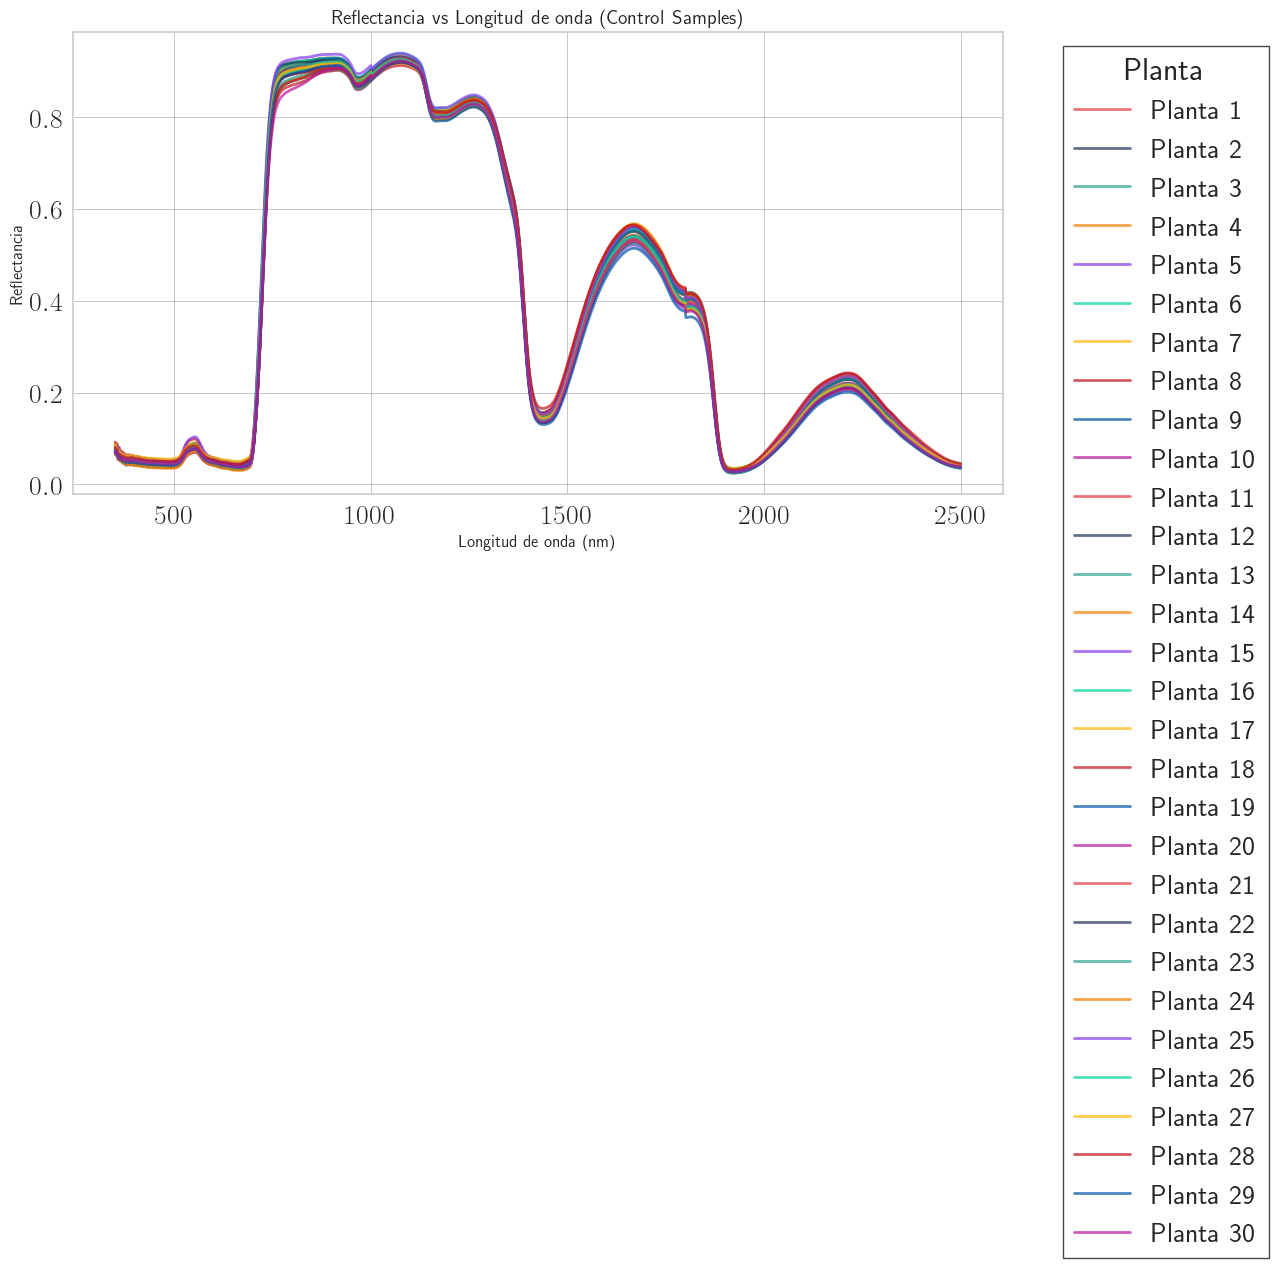

In [ ]:
df6_control = df6[df6['Tratamiento'] == 'Control']
df14_control = df14[df14['Tratamiento'] == 'Control']  

# Reshape data from wide to long format
df6_control_long = df6_control.melt(
    id_vars=['Tratamiento', 'Planta'], 
    var_name='Longitud de onda (nm)', 
    value_name='Reflectancia'
)
df6_control_long['Longitud de onda (nm)'] = df6_control_long['Longitud de onda (nm)'].astype(float)

# Plot the data as line plot
plt.figure(figsize=(12, 6))
for plant in df6_control_long['Planta'].unique():
    plant_data = df6_control_long[df6_control_long['Planta'] == plant]
    plt.plot(plant_data['Longitud de onda (nm)'], 
             plant_data['Reflectancia'], 
             label=f'Planta {plant}', 
             alpha=0.7, 
             linewidth=2)

plt.title('Reflectancia vs Longitud de onda (Control Samples)', fontsize=14, fontweight='bold')
plt.xlabel('Longitud de onda (nm)', fontsize=12)
plt.ylabel('Reflectancia', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Planta')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

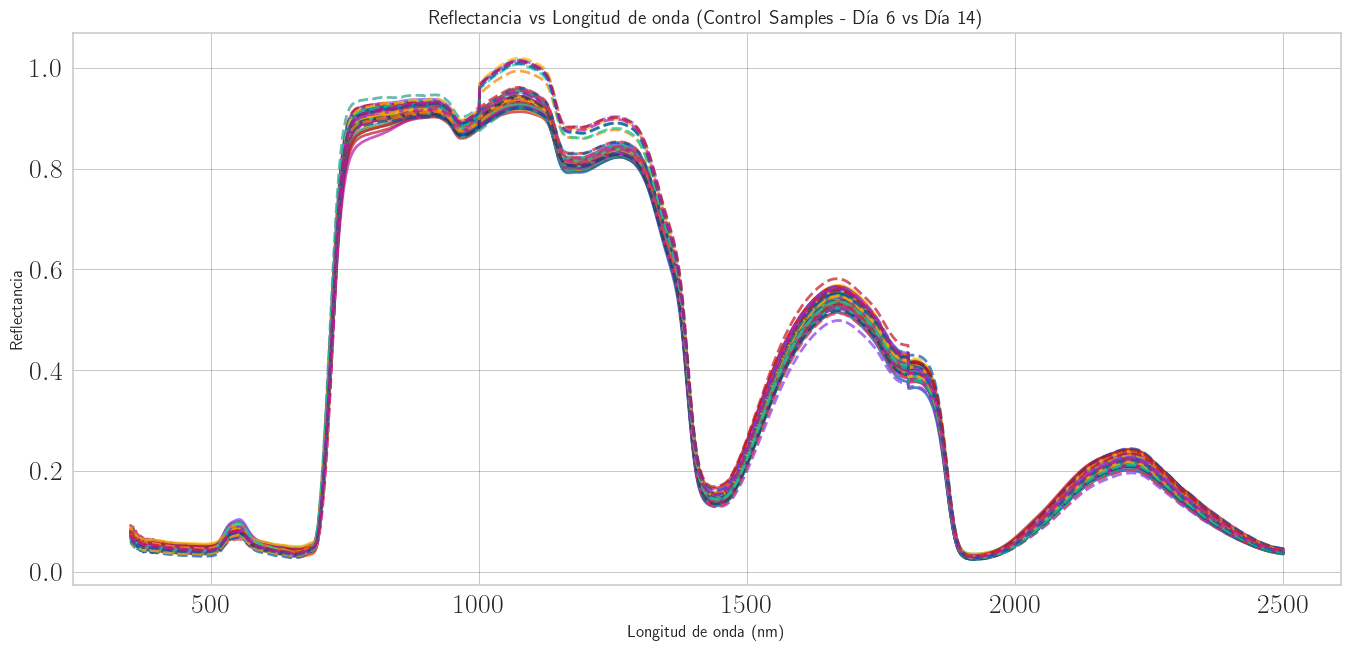

In [28]:
df6_control = df6[df6['Tratamiento'] == 'Control']
df14_control = df14[df14['Tratamiento'] == 'Control']  

# Reshape data from wide to long format for both dataframes
df6_control_long = df6_control.melt(
    id_vars=['Tratamiento', 'Planta'], 
    var_name='Longitud de onda (nm)', 
    value_name='Reflectancia'
)
df6_control_long['Longitud de onda (nm)'] = df6_control_long['Longitud de onda (nm)'].astype(float)
df6_control_long['Día'] = 6  # Add day identifier

df14_control_long = df14_control.melt(
    id_vars=['Tratamiento', 'Planta'], 
    var_name='Longitud de onda (nm)', 
    value_name='Reflectancia'
)
df14_control_long['Longitud de onda (nm)'] = df14_control_long['Longitud de onda (nm)'].astype(float)
df14_control_long['Día'] = 14  # Add day identifier

# Plot the data as line plot
plt.figure(figsize=(14, 7))

# Plot df6_control plants with solid lines
for plant in df6_control_long['Planta'].unique():
    plant_data = df6_control_long[df6_control_long['Planta'] == plant]
    plt.plot(plant_data['Longitud de onda (nm)'], 
             plant_data['Reflectancia'], 
             label=f'Día 6 - Planta {plant}', 
             alpha=0.7, 
             linewidth=2,
             linestyle='-')

# Plot df14_control plants with dashed lines
for plant in df14_control_long['Planta'].unique():
    plant_data = df14_control_long[df14_control_long['Planta'] == plant]
    plt.plot(plant_data['Longitud de onda (nm)'], 
             plant_data['Reflectancia'], 
             label=f'Día 14 - Planta {plant}', 
             alpha=0.7, 
             linewidth=2,
             linestyle='--')

plt.title('Reflectancia vs Longitud de onda (Control Samples - Día 6 vs Día 14)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Longitud de onda (nm)', fontsize=12)
plt.ylabel('Reflectancia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

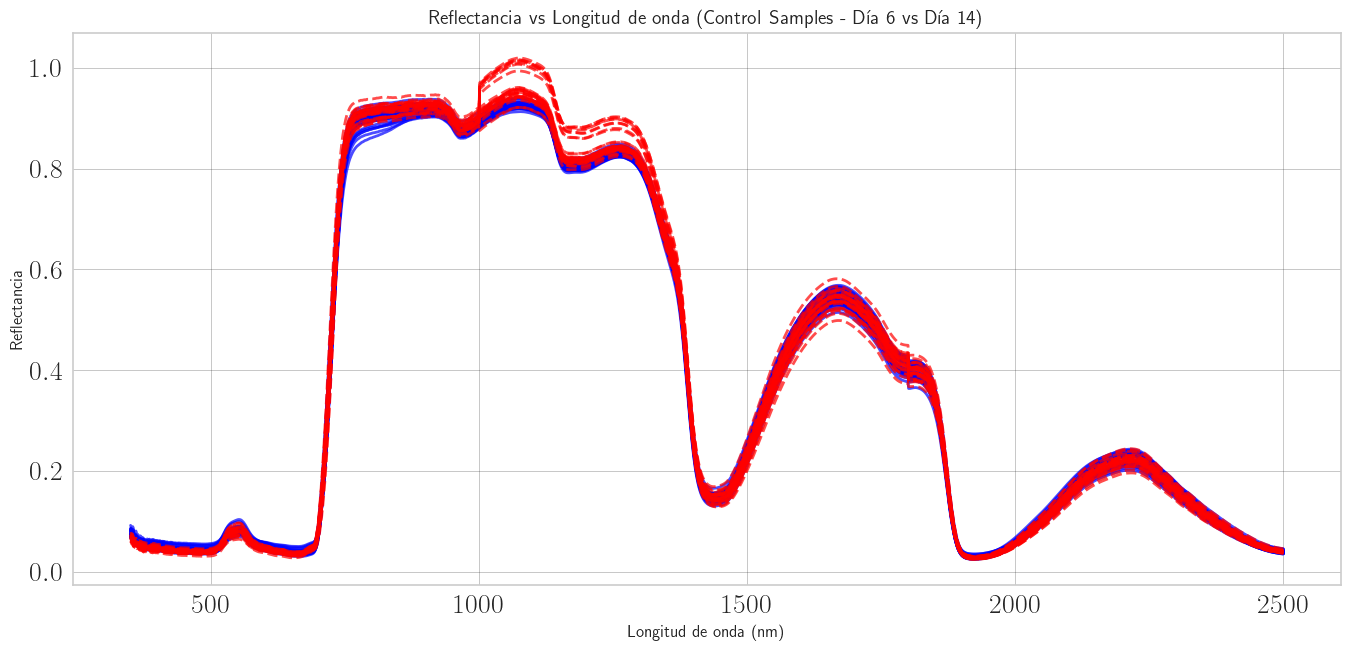

In [29]:
df6_control = df6[df6['Tratamiento'] == 'Control']
df14_control = df14[df14['Tratamiento'] == 'Control']  

# Reshape data from wide to long format for both dataframes
df6_control_long = df6_control.melt(
    id_vars=['Tratamiento', 'Planta'], 
    var_name='Longitud de onda (nm)', 
    value_name='Reflectancia'
)
df6_control_long['Longitud de onda (nm)'] = df6_control_long['Longitud de onda (nm)'].astype(float)
df6_control_long['Día'] = 6  # Add day identifier

df14_control_long = df14_control.melt(
    id_vars=['Tratamiento', 'Planta'], 
    var_name='Longitud de onda (nm)', 
    value_name='Reflectancia'
)
df14_control_long['Longitud de onda (nm)'] = df14_control_long['Longitud de onda (nm)'].astype(float)
df14_control_long['Día'] = 14  # Add day identifier

# Plot the data as line plot
plt.figure(figsize=(14, 7))

# Plot df6_control plants in blue with solid lines
for plant in df6_control_long['Planta'].unique():
    plant_data = df6_control_long[df6_control_long['Planta'] == plant]
    plt.plot(plant_data['Longitud de onda (nm)'], 
             plant_data['Reflectancia'], 
             label=f'Día 6 - Planta {plant}', 
             alpha=0.7, 
             linewidth=2,
             linestyle='-',
             color='blue')

# Plot df14_control plants in red with dashed lines
for plant in df14_control_long['Planta'].unique():
    plant_data = df14_control_long[df14_control_long['Planta'] == plant]
    plt.plot(plant_data['Longitud de onda (nm)'], 
             plant_data['Reflectancia'], 
             label=f'Día 14 - Planta {plant}', 
             alpha=0.7, 
             linewidth=2,
             linestyle='--',
             color='red')

plt.title('Reflectancia vs Longitud de onda (Control Samples - Día 6 vs Día 14)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Longitud de onda (nm)', fontsize=12)
plt.ylabel('Reflectancia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

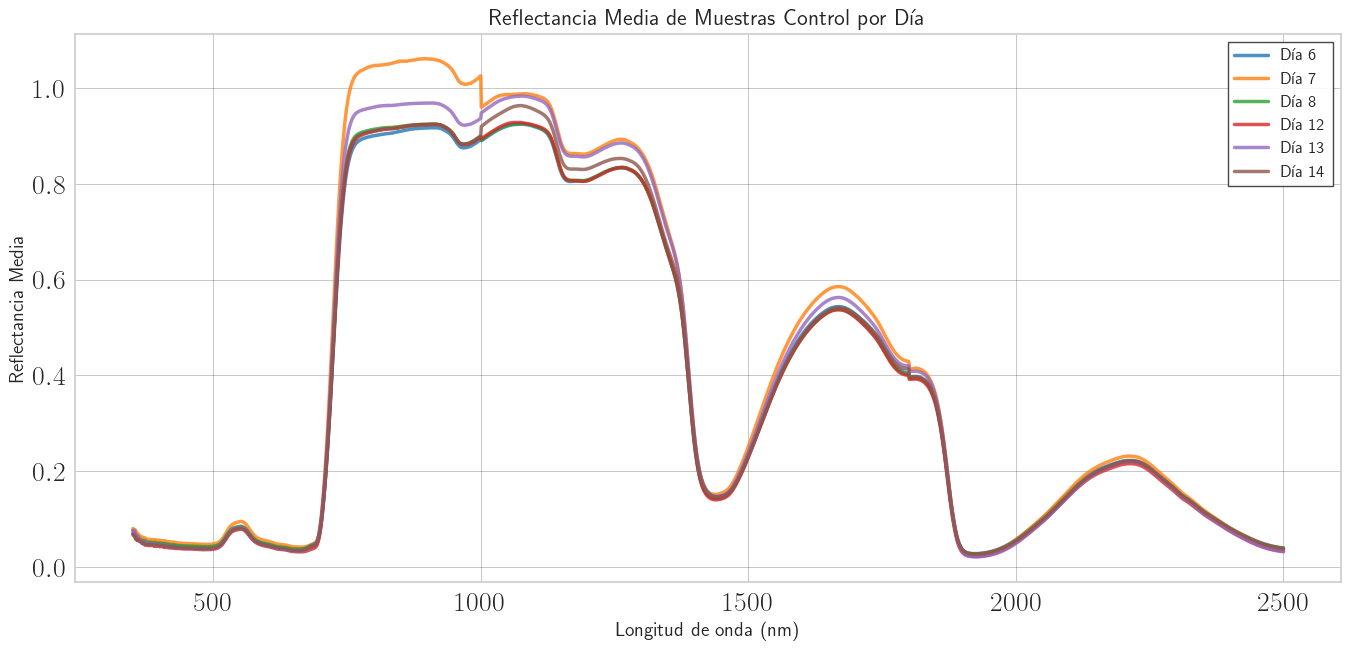

In [30]:
# Extract control samples for each day
df6_control = df6[df6['Tratamiento'] == 'Control']
df7_control = df7[df7['Tratamiento'] == 'Control'] 
df8_control = df8[df8['Tratamiento'] == 'Control'] 
df12_control = df12[df12['Tratamiento'] == 'Control']
df13_control = df13[df13['Tratamiento'] == 'Control']
df14_control = df14[df14['Tratamiento'] == 'Control']

# Calculate mean reflectance for each day
days_data = [
    (6, df6_control),
    (7, df7_control),
    (8, df8_control),
    (12, df12_control),
    (13, df13_control),
    (14, df14_control)
]

# Create the plot
plt.figure(figsize=(14, 7))

# Define colors for each day
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, (day, df_day) in enumerate(days_data):
    # Calculate mean across all control plants for this day
    mean_reflectance = df_day.iloc[:, 2:].mean(axis=0)
    wavelengths = mean_reflectance.index.astype(float)
    
    # Plot the mean line for this day
    plt.plot(wavelengths, mean_reflectance.values, 
             label=f'Día {day}', 
             linewidth=2.5, 
             alpha=0.8,
             color=colors[idx])

plt.xlabel('Longitud de onda (nm)', fontsize=14)
plt.ylabel('Reflectancia Media', fontsize=14)
plt.title('Reflectancia Media de Muestras Control por Día', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

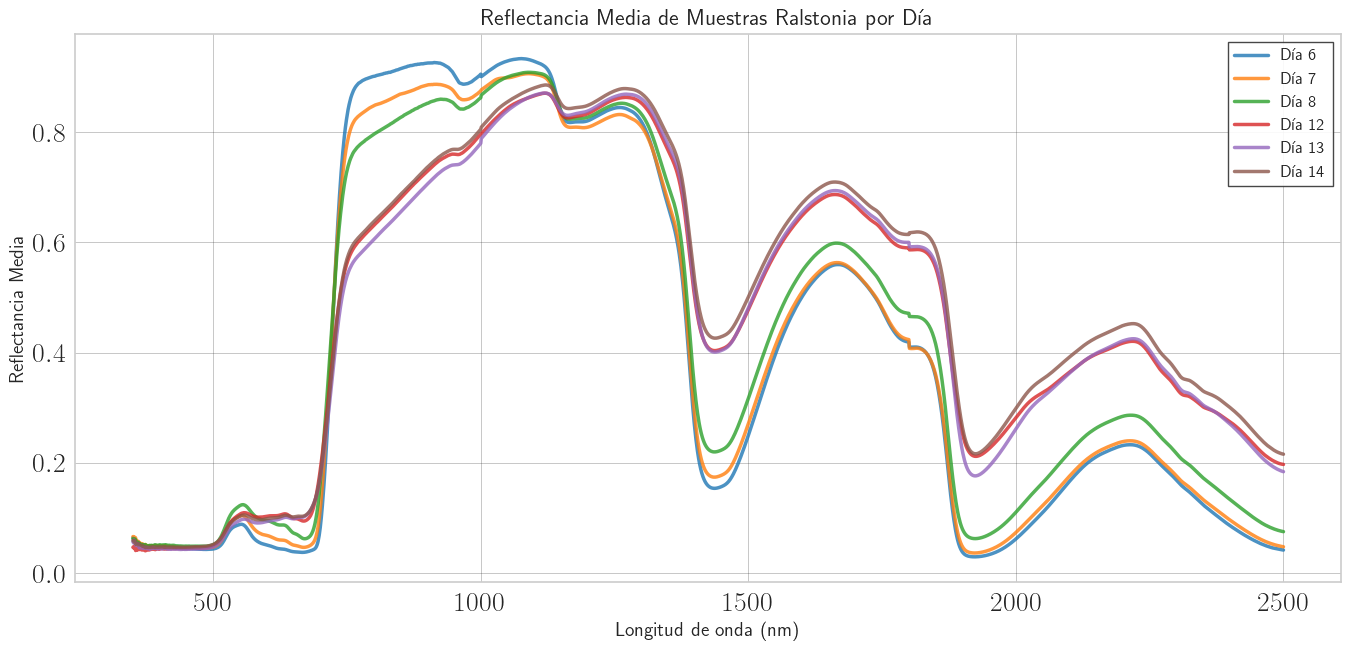

In [31]:
# Extract control samples for each day
df6_ralstonia = df6[df6['Tratamiento'] == 'Ralstonia']
df7_ralstonia = df7[df7['Tratamiento'] == 'Ralstonia'] 
df8_ralstonia = df8[df8['Tratamiento'] == 'Ralstonia'] 
df12_ralstonia = df12[df12['Tratamiento'] == 'Ralstonia']
df13_ralstonia = df13[df13['Tratamiento'] == 'Ralstonia']
df14_ralstonia = df14[df14['Tratamiento'] == 'Ralstonia']

# Calculate mean reflectance for each day
days_data = [
    (6, df6_ralstonia),
    (7, df7_ralstonia),
    (8, df8_ralstonia),
    (12, df12_ralstonia),
    (13, df13_ralstonia),
    (14, df14_ralstonia)
]

# Create the plot
plt.figure(figsize=(14, 7))

# Define colors for each day
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, (day, df_day) in enumerate(days_data):
    # Calculate mean across all control plants for this day
    mean_reflectance = df_day.iloc[:, 2:].mean(axis=0)
    wavelengths = mean_reflectance.index.astype(float)
    
    # Plot the mean line for this day
    plt.plot(wavelengths, mean_reflectance.values, 
             label=f'Día {day}', 
             linewidth=2.5, 
             alpha=0.8,
             color=colors[idx])

plt.xlabel('Longitud de onda (nm)', fontsize=14)
plt.ylabel('Reflectancia Media', fontsize=14)
plt.title('Reflectancia Media de Muestras Ralstonia por Día', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

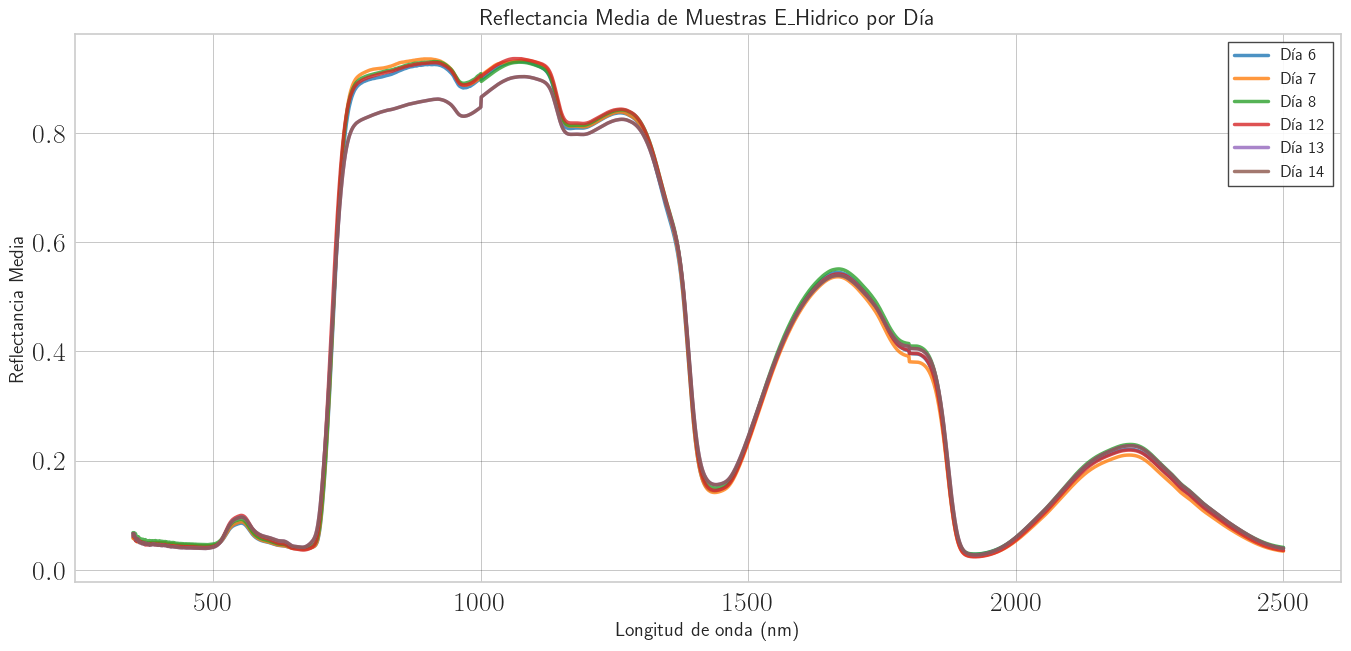

In [32]:
# Extract control samples for each day
df6_E_Hidrico = df6[df6['Tratamiento'] == 'E_Hidrico']
df7_E_Hidrico = df7[df7['Tratamiento'] == 'E_Hidrico'] 
df8_E_Hidrico = df8[df8['Tratamiento'] == 'E_Hidrico'] 
df12_E_Hidrico = df12[df12['Tratamiento'] == 'E_Hidrico']
df13_E_Hidrico = df13[df13['Tratamiento'] == 'E_Hidrico']
df14_E_Hidrico = df14[df14['Tratamiento'] == 'E_Hidrico']

# Calculate mean reflectance for each day
days_data = [
    (6, df6_E_Hidrico),
    (7, df7_E_Hidrico),
    (8, df8_E_Hidrico),
    (12, df12_E_Hidrico),
    (13, df13_E_Hidrico),
    (14, df14_E_Hidrico)
]

# Create the plot
plt.figure(figsize=(14, 7))

# Define colors for each day
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, (day, df_day) in enumerate(days_data):
    # Calculate mean across all control plants for this day
    mean_reflectance = df_day.iloc[:, 2:].mean(axis=0)
    wavelengths = mean_reflectance.index.astype(float)
    
    # Plot the mean line for this day
    plt.plot(wavelengths, mean_reflectance.values, 
             label=f'Día {day}', 
             linewidth=2.5, 
             alpha=0.8,
             color=colors[idx])

plt.xlabel('Longitud de onda (nm)', fontsize=14)
plt.ylabel('Reflectancia Media', fontsize=14)
plt.title('Reflectancia Media de Muestras E_Hidrico por Día', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Proof of concept
Rasltonia plant number 7

In [2]:
# Lets take only the plant with illness Rasltonia number 7
df6_Con = df6[(df6['Planta'] == 7) & (df6['Tratamiento'] == 'Ralstonia')]
df7_Con = df7[(df7['Planta'] == 7) & (df7['Tratamiento'] == 'Ralstonia')]
df8_Con = df8[(df8['Planta'] == 7) & (df8['Tratamiento'] == 'Ralstonia')]
df12_Con = df12[(df12['Planta'] == 7) & (df12['Tratamiento'] == 'Ralstonia')]
df13_Con = df13[(df13['Planta'] == 7) & (df13['Tratamiento'] == 'Ralstonia')]
df14_Con = df14[(df14['Planta'] == 7) & (df14['Tratamiento'] == 'Ralstonia')]

# Combine all dataframes into a single dataframe
df_con = pd.concat([df6_Con, df7_Con, df8_Con, df12_Con, df13_Con, df14_Con]).reset_index(drop=True)

df_con.head(6)


,Tratamiento,Planta,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Ralstonia,7,0.064177,0.063245,0.058887,0.060241,0.058952,0.055375,0.056037,0.053561,...,0.036596,0.036476,0.036312,0.036145,0.035975,0.035804,0.035539,0.035495,0.035605,0.035581
1,Ralstonia,7,0.062351,0.064638,0.058746,0.061213,0.063872,0.062495,0.057283,0.053732,...,0.032498,0.032368,0.032248,0.032141,0.032061,0.031981,0.031934,0.031805,0.031654,0.031489
2,Ralstonia,7,0.058094,0.056767,0.054676,0.056376,0.057880,0.057174,0.054185,0.048354,...,0.037322,0.037199,0.037132,0.036965,0.036678,0.036491,0.036290,0.036147,0.036079,0.036005
3,Ralstonia,7,0.044563,0.047612,0.048098,0.046436,0.043634,0.041645,0.042584,0.041907,...,0.493763,0.493374,0.492945,0.492736,0.492639,0.492485,0.492530,0.492435,0.492155,0.492047
4,Ralstonia,7,0.036095,0.035093,0.043498,0.038010,0.033583,0.034200,0.034455,0.035554,...,0.330153,0.329474,0.328868,0.328228,0.327607,0.327077,0.326553,0.326100,0.325818,0.325363
5,Ralstonia,7,0.044433,0.045509,0.043752,0.045598,0.043573,0.039644,0.041836,0.040399,...,0.411820,0.411261,0.410464,0.409891,0.409279,0.408793,0.408533,0.408126,0.407645,0.407267


Magnitude of the relative error vectors for each wavelength

In [ ]:
# Extract the relevant columns (from column 2 onwards)
data_cols = df_con.iloc[:, 2:]

# Calculate the magnitude for each column
magnitudes = []

for col in data_cols.columns:
    # Get the column values
    values = data_cols[col].values
    
    # Take the first value as reference (x)
    x = values[0]
    
    # Calculate |y-x|/x, |z-x|/x, etc. for all other values
    if x != 0:  # Avoid division by zero
        differences = np.abs(values[1:] - x) / x
        # Calculate the magnitude (Euclidean norm)
        magnitude = np.sqrt(np.sum(differences**2))
    else:
        magnitude = np.nan  # Handle zero reference value
    
    magnitudes.append(magnitude)

# Create a dataframe with one row containing all magnitudes
df_mag = pd.DataFrame([magnitudes], columns=data_cols.columns)

# Display the result
print(f"Shape of result: {df_mag.shape}")
df_mag.head()

Shape of result: (1, 2151)


,350,351,352,353,354,355,356,357,358,359,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.623944,0.590647,0.415981,0.502168,0.572767,0.553165,0.521333,0.479808,0.460114,0.479579,...,18.04263,18.083598,18.144765,18.215471,18.290413,18.368819,18.508572,18.51947,18.440637,18.440305


Visualization of the magnitudes

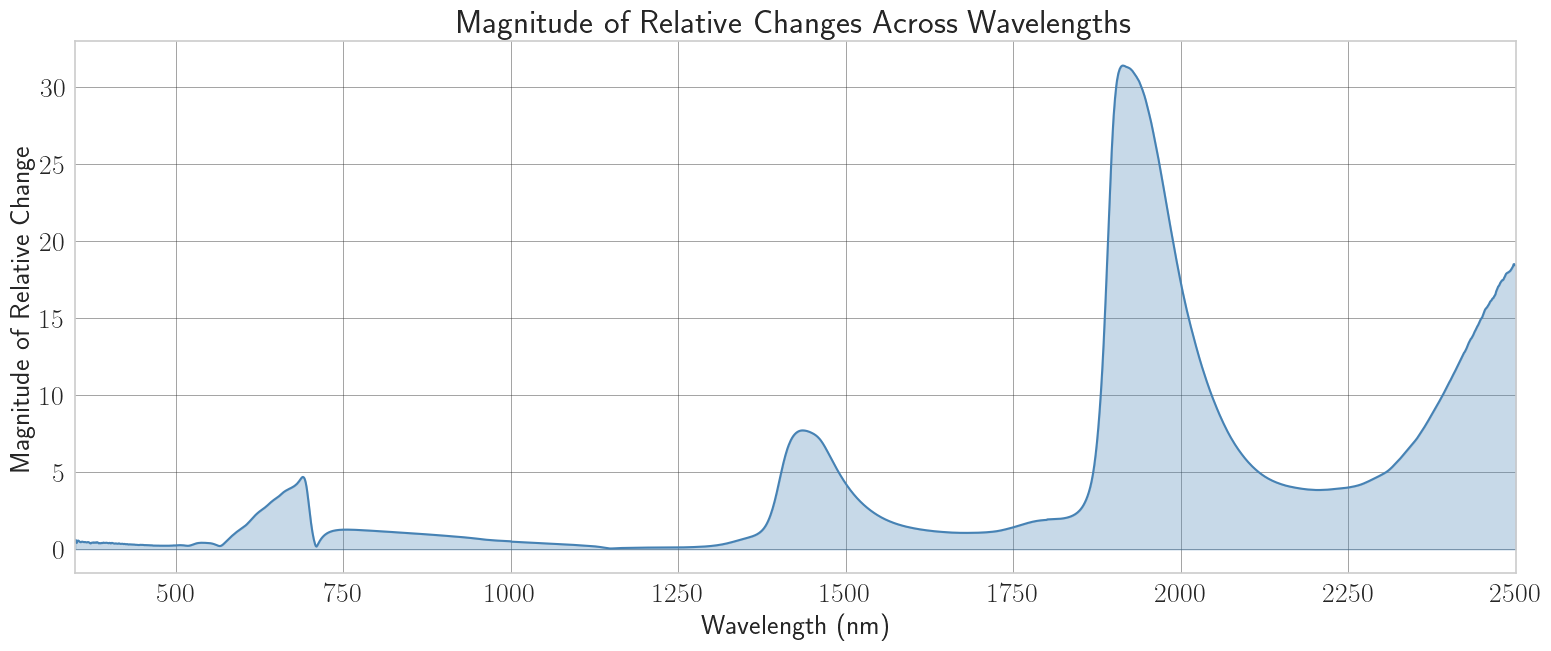

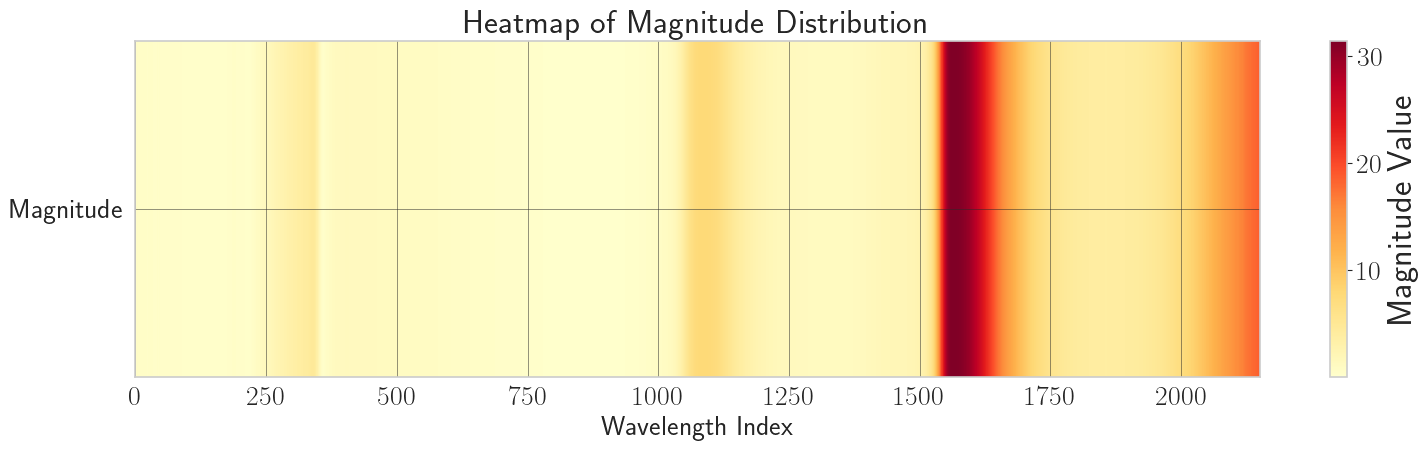


=== Summary Statistics ===
Mean magnitude: 4.3917
Std magnitude: 6.5582
Min magnitude: 0.0533 at wavelength 1149 nm
Max magnitude: 31.4094 at wavelength 1913 nm


In [4]:
# Create separate visualizations of the magnitudes

# Convert wavelengths to numeric for plotting
wavelengths = df_mag.columns.astype(float)
magnitudes_values = df_mag.iloc[0].values

# Plot 1: Line plot of magnitudes across wavelengths
plt.figure(figsize=(16, 7))
plt.plot(wavelengths, magnitudes_values, linewidth=1.5, color='steelblue')
plt.fill_between(wavelengths, magnitudes_values, alpha=0.3, color='steelblue')
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Magnitude of Relative Change', fontsize=20)
plt.title('Magnitude of Relative Changes Across Wavelengths', fontsize=24, fontweight='bold')
plt.grid(True, alpha=0.5)
plt.xlim(wavelengths.min(), wavelengths.max())
plt.tight_layout()
plt.show()


# Plot 2: Heatmap view
fig2, ax2 = plt.subplots(figsize=(16,5))
im = ax2.imshow([magnitudes_values], aspect='auto', cmap='YlOrRd', interpolation='nearest')
ax2.set_xlabel('Wavelength Index', fontsize=20)
ax2.set_title('Heatmap of Magnitude Distribution', fontsize=24, fontweight='bold')
ax2.set_yticks([0])
ax2.set_yticklabels(['Magnitude'])
plt.colorbar(im, ax=ax2, label='Magnitude Value')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"Mean magnitude: {magnitudes_values.mean():.4f}")
print(f"Std magnitude: {magnitudes_values.std():.4f}")
print(f"Min magnitude: {magnitudes_values.min():.4f} at wavelength {wavelengths[magnitudes_values.argmin()]:.0f} nm")
print(f"Max magnitude: {magnitudes_values.max():.4f} at wavelength {wavelengths[magnitudes_values.argmax()]:.0f} nm")

## Generalization

In [5]:
# Now let's make a generalization and collect all magnitudes in one dataframe

# Initialize an empty list to collect all magnitude rows
all_magnitudes = []

for treatment in df_concatenation['Tratamiento'].unique():
    df_treat = df_concatenation[df_concatenation['Tratamiento'] == treatment]
    for plant_num in df_treat['Planta'].unique():
        df_plant = df_treat[df_treat['Planta'] == plant_num]
        
        # Extract the relevant columns (from column 2 onwards)
        data_cols = df_plant.iloc[:, 2:]

        # Calculate the magnitude for each column
        magnitudes = []

        for col in data_cols.columns:
            # Get the column values
            values = data_cols[col].values
            
            # Take the first value as reference (x)
            x = values[0]
            
            # Calculate |y-x|/x, |z-x|/x, etc. for all other values
            if x != 0:  # Avoid division by zero
                differences = np.abs(values[1:] - x) / x
                # Calculate the magnitude (Euclidean norm)
                magnitude = np.sqrt(np.sum(differences**2))
            else:
                magnitude = np.nan  # Handle zero reference value
            
            magnitudes.append(magnitude)

        # Create a row with treatment and plant info plus magnitudes
        row_data = {'Tratamiento': treatment, 'Planta': plant_num}
        row_data.update({col: mag for col, mag in zip(data_cols.columns, magnitudes)})
        
        all_magnitudes.append(row_data)

# Create the final dataframe with all magnitudes
df_all_magnitudes = pd.DataFrame(all_magnitudes)

# Display the result
print(f"Final shape: {df_all_magnitudes.shape}")
print(f"Treatments: {df_all_magnitudes['Tratamiento'].unique()}")
print(f"Number of plants: {len(df_all_magnitudes)}")
df_all_magnitudes.head()

Final shape: (119, 2153)
Treatments: ['Control' 'Ralstonia' 'E_Hidrico' 'Ral_EH']
Number of plants: 119


,Tratamiento,Planta,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.348469,0.274950,0.169327,0.173785,0.238250,0.283184,0.195628,0.175850,...,0.273717,0.276836,0.286174,0.289927,0.293015,0.293995,0.290819,0.290206,0.291274,0.288385
1,Control,2,0.155824,0.190527,0.224944,0.150503,0.147361,0.317368,0.312134,0.147241,...,0.192202,0.192745,0.198575,0.199459,0.198265,0.198445,0.197362,0.196341,0.196773,0.196283
2,Control,3,0.280838,0.309616,0.324340,0.281449,0.324965,0.402762,0.352363,0.311057,...,0.270885,0.273355,0.277472,0.279986,0.285827,0.290248,0.291716,0.294405,0.301662,0.301695
3,Control,4,0.220213,0.258044,0.247767,0.293301,0.292614,0.236567,0.171207,0.176581,...,0.186793,0.188635,0.189048,0.191425,0.196979,0.198379,0.198701,0.198723,0.195768,0.194991
4,Control,5,0.266860,0.306777,0.177923,0.176882,0.278976,0.353315,0.336714,0.184983,...,0.204338,0.205362,0.205316,0.206380,0.210206,0.212020,0.213329,0.212018,0.209056,0.208254


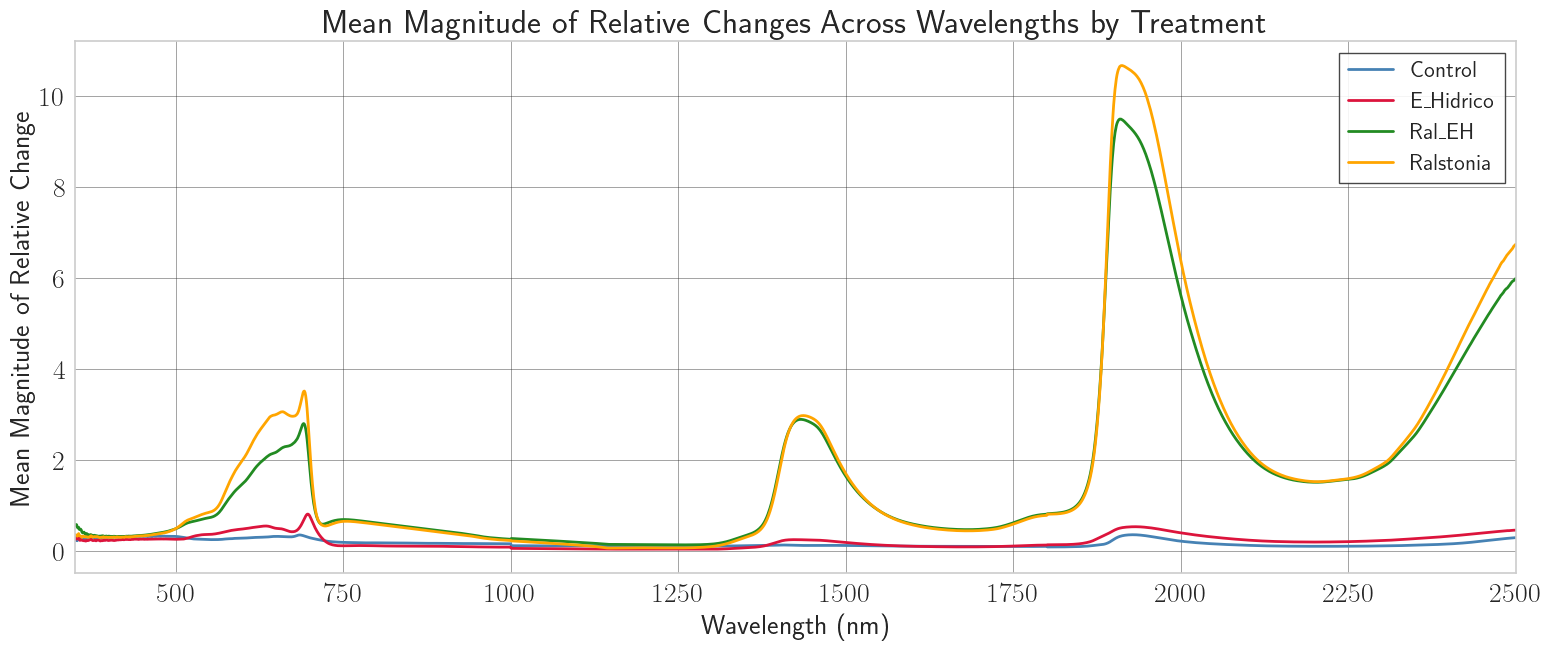

In [6]:
# now plots per treatment

# Lets make the mean of each wavelength magnitude per treatment
mean_magnitudes_per_treatment = df_all_magnitudes.groupby('Tratamiento').mean(numeric_only=True).reset_index()
mean_magnitudes_per_treatment.head()

# Plot all treatments in one figure with different colors
plt.figure(figsize=(16, 7))

# Define colors for each treatment
colors = ['steelblue', 'crimson', 'forestgreen', 'orange', 'purple', 'brown', 'pink', 'gray']

for idx, treatment in enumerate(mean_magnitudes_per_treatment['Tratamiento']):
    df_treat_mean = mean_magnitudes_per_treatment[mean_magnitudes_per_treatment['Tratamiento'] == treatment]
    
    # Get magnitude values for this treatment
    magnitudes_values = df_treat_mean[wavelengths].values.flatten()
    
    # Plot line for this treatment
    plt.plot(wavelengths, magnitudes_values, linewidth=2, 
             label=treatment, color=colors[idx % len(colors)])

plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Mean Magnitude of Relative Change', fontsize=20)
plt.title('Mean Magnitude of Relative Changes Across Wavelengths by Treatment', fontsize=24, fontweight='bold')
plt.grid(True, alpha=0.5)
plt.xlim(wavelengths.min(), wavelengths.max())
plt.legend(fontsize=16, loc='best')
plt.tight_layout()
plt.show()

### PCA components comparison

PCA for ralstonia

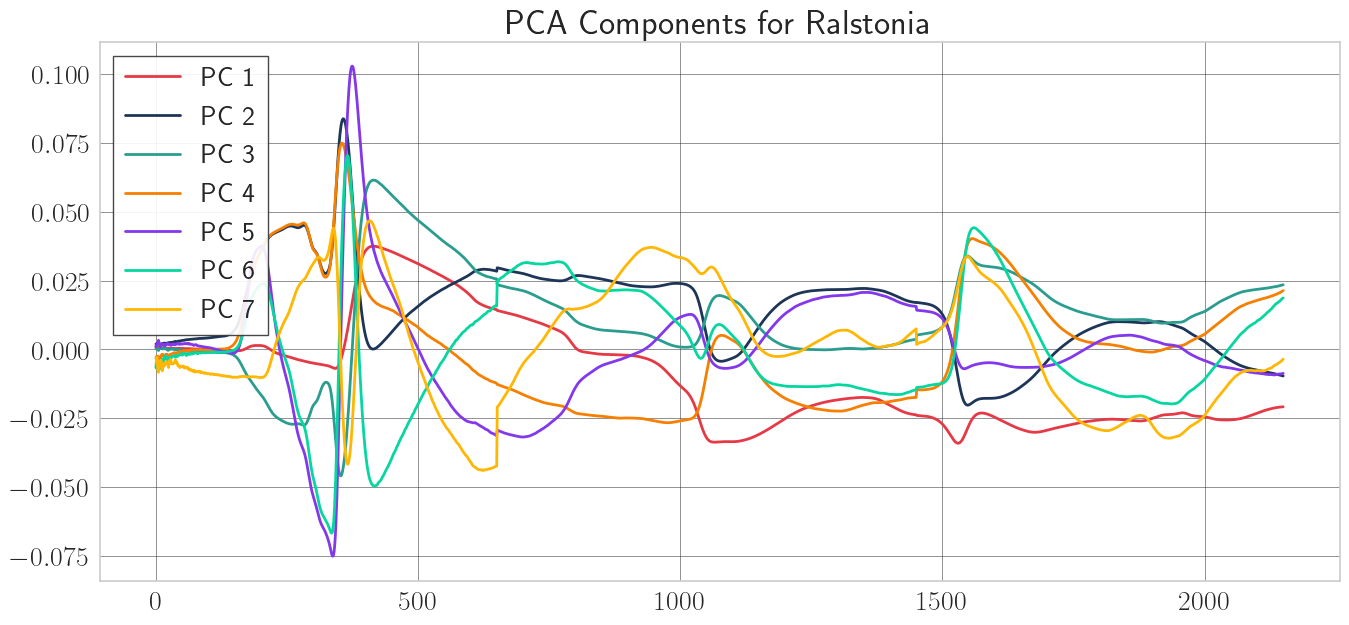

In [7]:
# lets make a PCA and compare the results with the .components

pca = PCA(n_components=7)

df_rals = df_concatenation[df_concatenation['Tratamiento'] == 'Ralstonia']

X_rals = df_rals.iloc[:, 2:].values

X_rals_pca = pca.fit_transform(X_rals)

# Now plot the PCA components
plt.figure(figsize=(16, 7))
for i in range(pca.n_components):
    plt.plot(pca.components_[i], label=f'PC {i+1}')
plt.legend()
plt.title('PCA Components for Ralstonia')
plt.show()

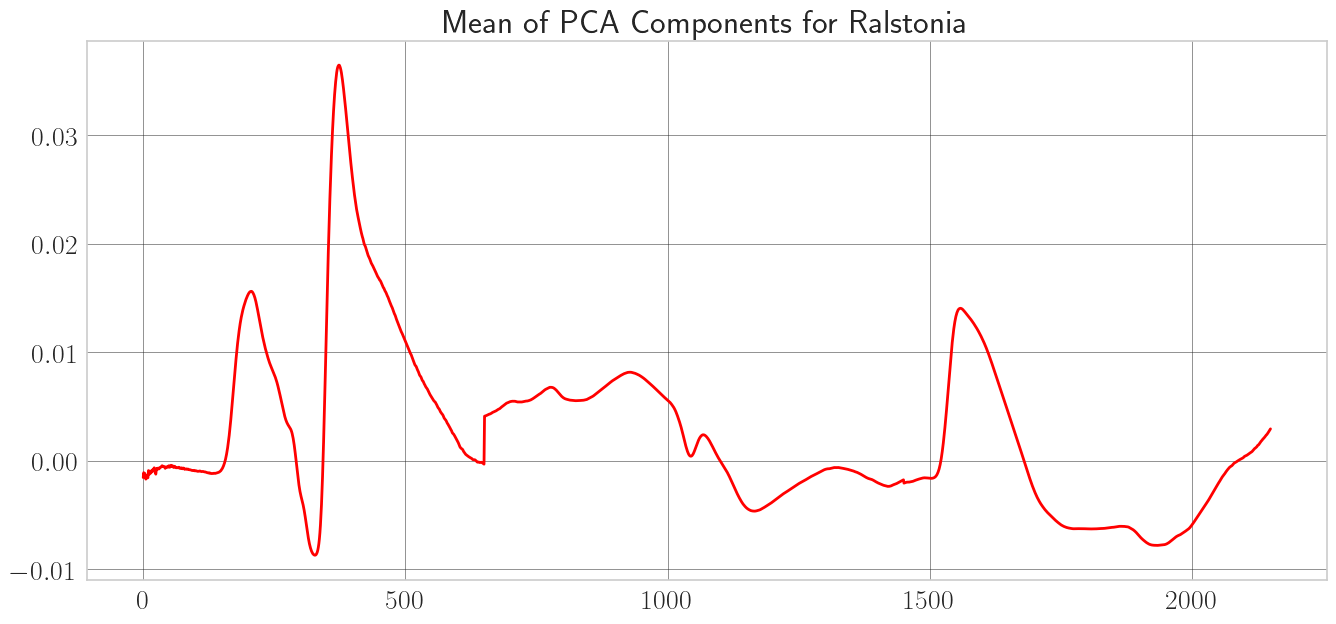

In [8]:
# Lets make an average of the PCA .components_ for X_rals_pca
mean_pca_components = np.mean(pca.components_, axis=0)
plt.figure(figsize=(16, 7))
plt.plot(mean_pca_components, color='red', linewidth=2)
plt.title('Mean of PCA Components for Ralstonia', fontsize=24, fontweight='bold')
plt.show()

pca for control

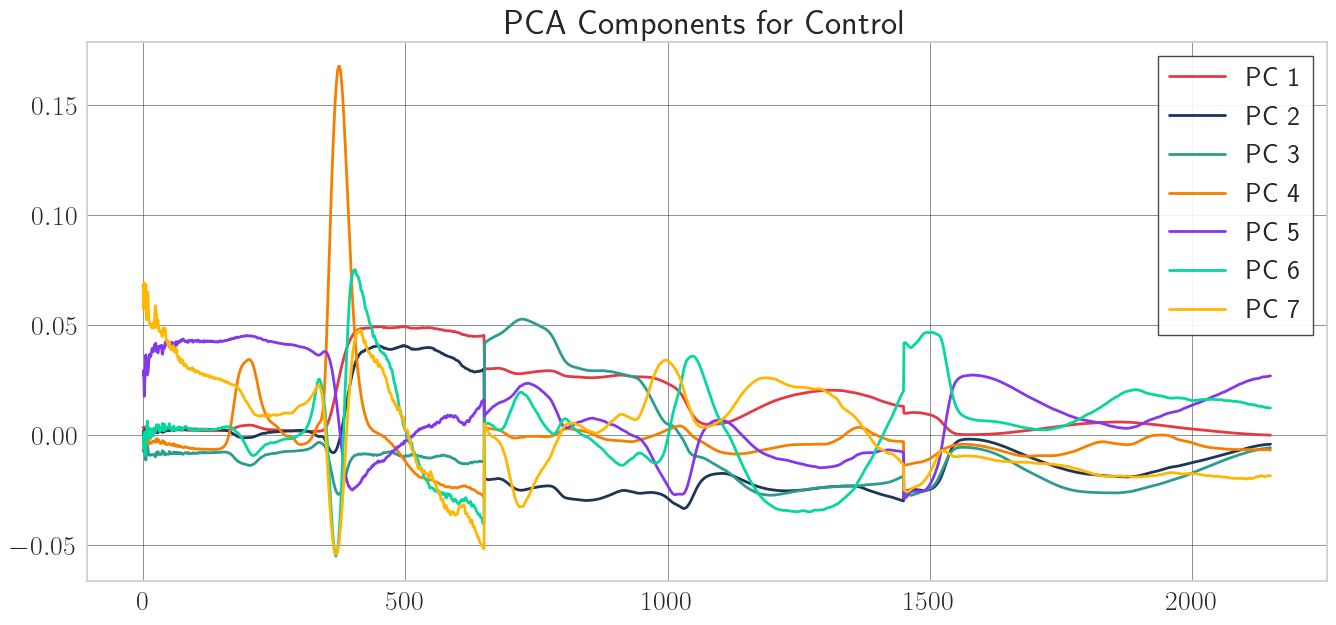

In [9]:
# lets make a PCA and compare the results with the .components

pca = PCA(n_components=7)

df_rals = df_concatenation[df_concatenation['Tratamiento'] == 'Control']

X_rals = df_rals.iloc[:, 2:].values

X_rals_pca = pca.fit_transform(X_rals)

# Now plot the PCA components
plt.figure(figsize=(16, 7))
for i in range(pca.n_components):
    plt.plot(pca.components_[i], label=f'PC {i+1}')
plt.legend()
plt.title('PCA Components for Control')
plt.show()

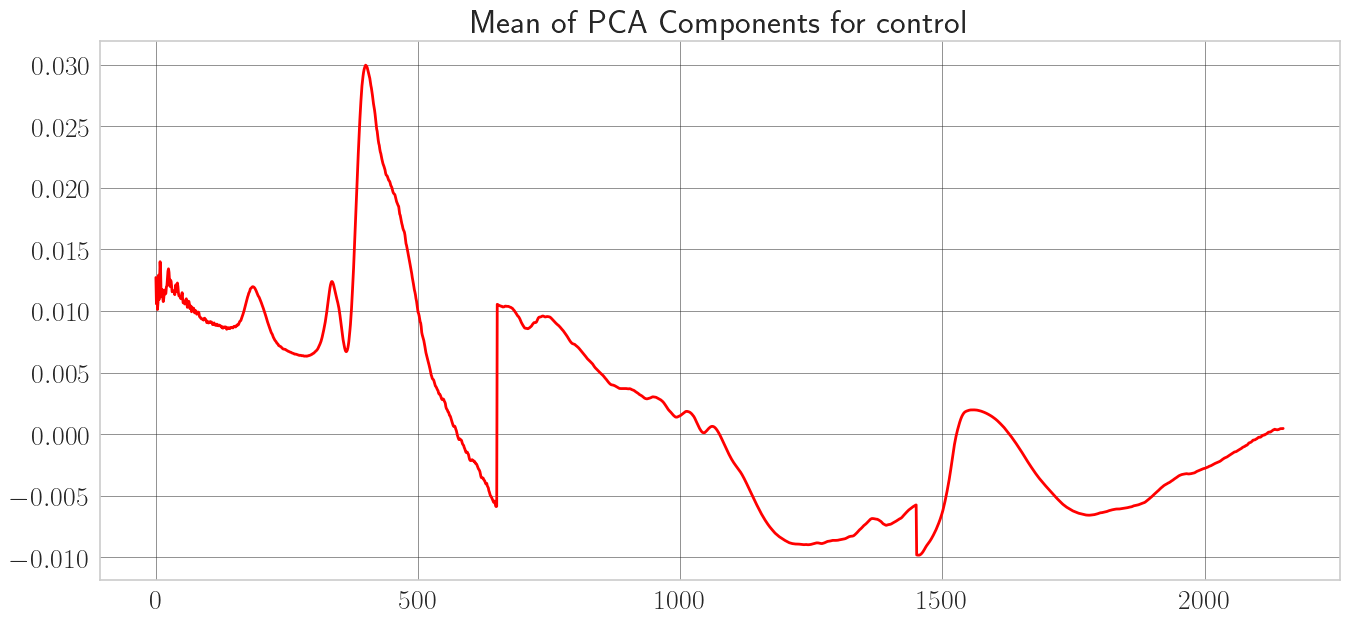

In [10]:
# Lets make an average of the PCA .components_ for X_rals_pca
mean_pca_components = np.mean(pca.components_, axis=0)
plt.figure(figsize=(16, 7))
plt.plot(mean_pca_components, color='red', linewidth=2)
plt.title('Mean of PCA Components for control', fontsize=24, fontweight='bold')
plt.show()

PCA for E_Hidrico

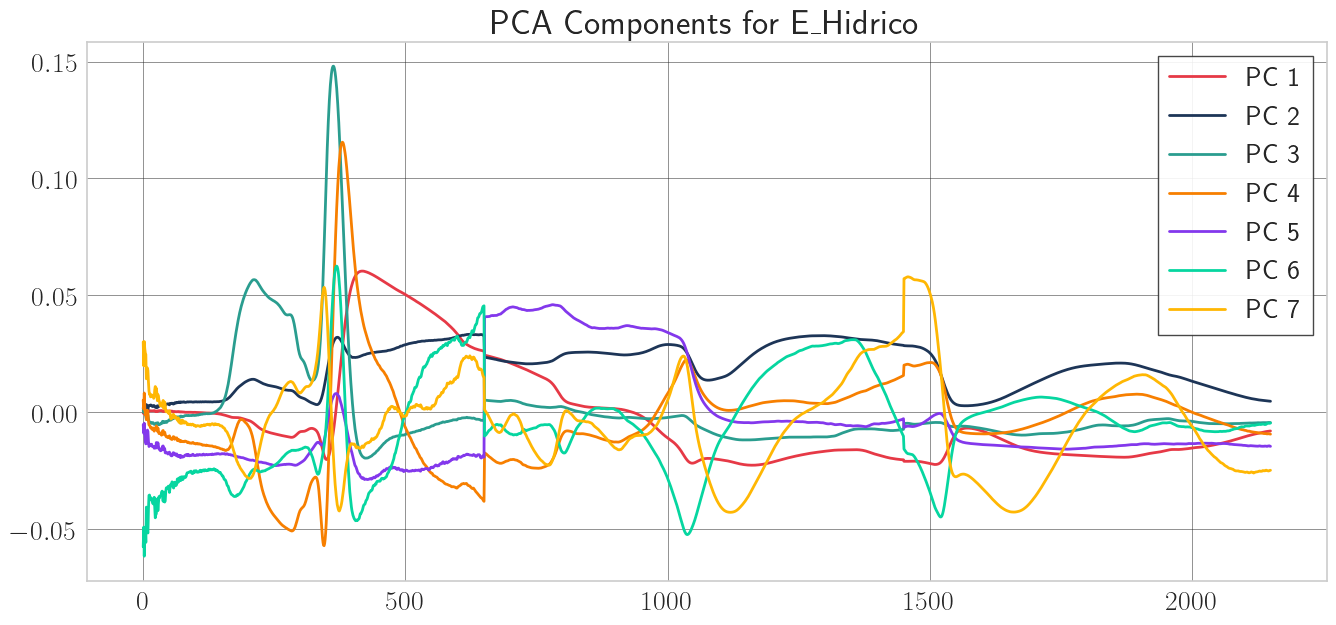

In [11]:
# lets make a PCA and compare the results with the .components

pca = PCA(n_components=7)

df_rals = df_concatenation[df_concatenation['Tratamiento'] == 'E_Hidrico']

X_rals = df_rals.iloc[:, 2:].values

X_rals_pca = pca.fit_transform(X_rals)

# Now plot the PCA components
plt.figure(figsize=(16, 7))
for i in range(pca.n_components):
    plt.plot(pca.components_[i], label=f'PC {i+1}')
plt.legend()
plt.title('PCA Components for E_Hidrico')
plt.show()

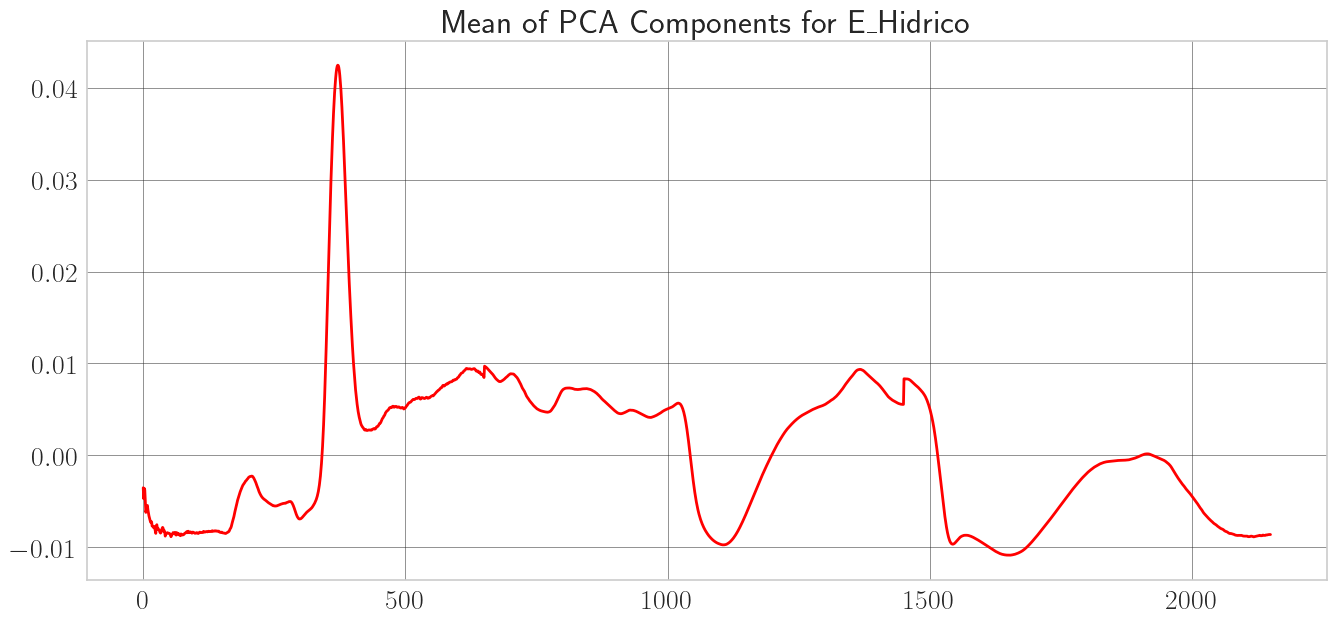

In [12]:
# Lets make an average of the PCA .components_ for X_rals_pca
mean_pca_components = np.mean(pca.components_, axis=0)
plt.figure(figsize=(16, 7))
plt.plot(mean_pca_components, color='red', linewidth=2)
plt.title('Mean of PCA Components for E_Hidrico', fontsize=24, fontweight='bold')
plt.show()

PCA for Ral_EH

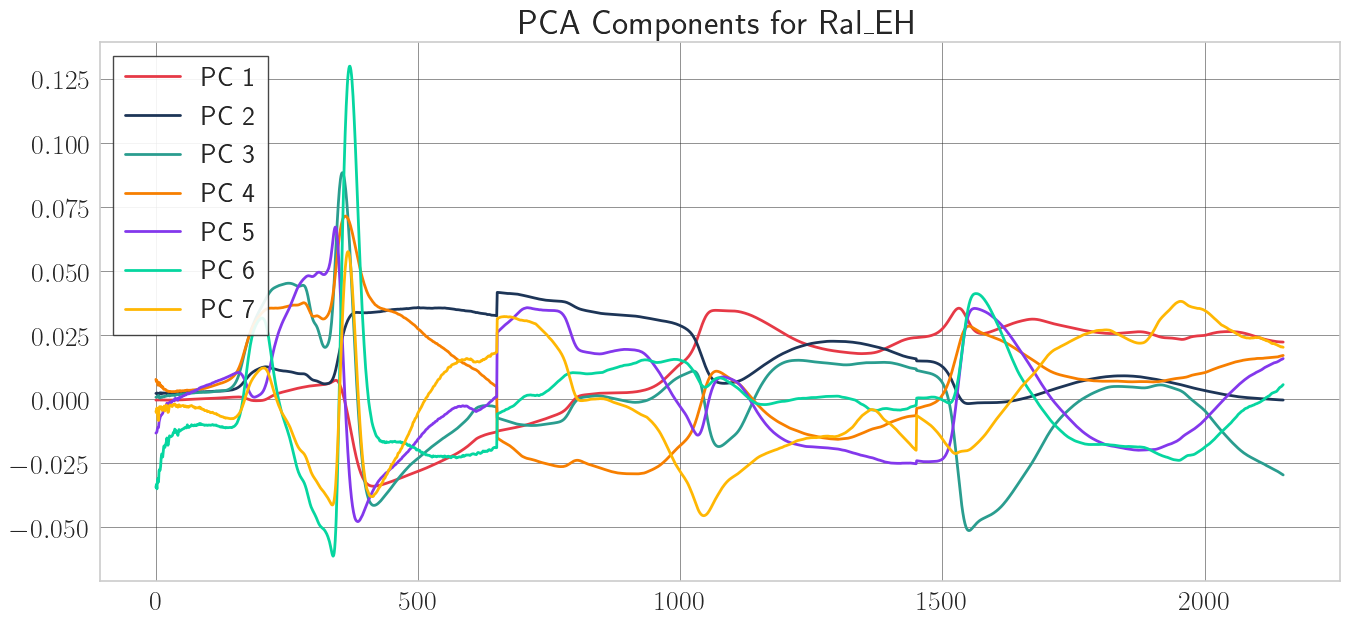

In [13]:
# lets make a PCA and compare the results with the .components

pca = PCA(n_components=7)

df_rals = df_concatenation[df_concatenation['Tratamiento'] == 'Ral_EH']

X_rals = df_rals.iloc[:, 2:].values

X_rals_pca = pca.fit_transform(X_rals)

# Now plot the PCA components
plt.figure(figsize=(16, 7))
for i in range(pca.n_components):
    plt.plot(pca.components_[i], label=f'PC {i+1}')
plt.legend()
plt.title('PCA Components for Ral_EH')
plt.show()

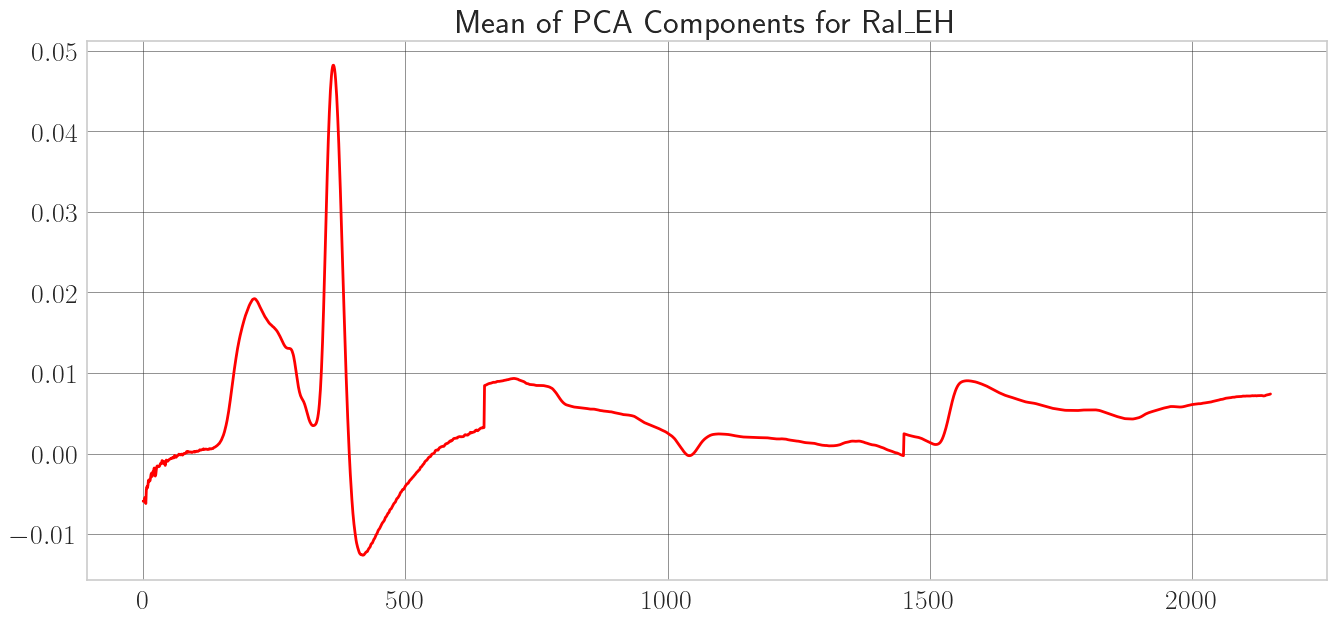

In [14]:
# Lets make an average of the PCA .components_ for X_rals_pca
mean_pca_components = np.mean(pca.components_, axis=0)
plt.figure(figsize=(16, 7))
plt.plot(mean_pca_components, color='red', linewidth=2)
plt.title('Mean of PCA Components for Ral_EH', fontsize=24, fontweight='bold')
plt.show()